In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import ast
import re
import os
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [ ]:
movie_df = pd.read_csv('TMDB_movie_dataset_v11.csv')
print("There are {} rows in the dataset".format(movie_df.shape[0]))

There are 1109669 rows in the dataset


In [ ]:
# lower case all columns
movie_df.columns = movie_df.columns.str.lower()

In [ ]:
#Check the columns
movie_df.columns
print("The columns in the dataset are: ", movie_df.columns)

The columns in the dataset are:  Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')


In [ ]:
movie_df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [ ]:
# Check type of value in each column
movie_df.dtypes
print("The data types in the dataset are: ", movie_df.dtypes)

The data types in the dataset are:  id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
keywords                 object
dtype: object


In [ ]:
movie_df.isna().sum()

,0
id,0
title,13
vote_average,0
vote_count,0
status,0
release_date,174976
revenue,0
runtime,0
adult,0
backdrop_path,812550


In [ ]:
# Check the number of unique values in each column
movie_df.nunique()

,0
id,1108967
title,953209
vote_average,5024
vote_count,3598
status,6
release_date,42602
revenue,14271
runtime,749
adult,2
backdrop_path,294627


In [ ]:
# Check for duplicate rows
movie_df.duplicated().sum()

366

In [ ]:
# see the duplicated rows
movie_df[movie_df.duplicated()]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
232862,1226029,Dima Koval: Stand-up from Vegas,10.0,1,Released,2023-12-05,0,0,False,NaN,...,Dima Koval: Stand-up from Vegas,NaN,1.40,/gMREsQHG7Na3Tmhdg4OH51LPHt.jpg,NaN,Comedy,Standup-view,Russia,Russian,"stand-up comedy, stand-up russia"
234154,1220680,Mr. Kobayashi,10.0,1,Released,NaN,0,0,False,NaN,...,Mr. Kobayashi,NaN,0.63,/h4Xyf3gJgCWVTMlz1yuSqPLSVZ3.jpg,NaN,"Action, Drama",NaN,NaN,NaN,"samurai, katana sword"
250985,1236071,Semetua,9.0,1,Released,2018-02-07,0,44,False,NaN,...,Semetua,"Semetua was Sem Manutahi, master of ceremonies...",0.60,/yulre2ndAtvrLJ09u1R4wSKLtep.jpg,"Semetua was Sem Manutahi, master of ceremonies...",Documentary,In Vivo Prod,French Polynesia,French,NaN
284705,1199990,The Undead,10.0,1,Released,2023-10-27,0,66,False,NaN,...,The Undead,At the end of times a dysfunctional family tak...,1.40,/jsKHGufgfXgVXuiQ23MK6CtFPvN.jpg,The end is just the beginning,"Horror, Thriller","Bud Rebel Productions, TEGMENTAL",United States of America,NaN,"undead, religion, dead children, religious horror"
287356,1214170,Frienemies,10.0,1,Released,2013-07-15,0,11,False,/kssDqwfU82S2h1omqkuvCr9CJ8p.jpg,...,Frienemies,"Four friends Mike, Shane, Diego and Matt plan ...",0.60,/vRjOyfbNFb85JN8oeCMmBSu1oXx.jpg,Friendships come and go.,"Comedy, Action, Thriller",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676352,1298227,HOMA-069 - How To Make A Female Doctor Your Pu...,0.0,0,Released,NaN,0,0,True,NaN,...,HOMA-069 - 女医のマ○コペットの作り方 篠崎かんな,AV movie starring Kanna Shinozaki. Kanna Shino...,0.00,/PmraYTPhaDt06TWcEOkfp5khDz.jpg,NaN,NaN,NaN,NaN,Japanese,NaN
698953,1306194,Bred & Breakfast: All the Way Inn,0.0,0,Released,2024-01-01,0,120,True,NaN,...,Bred & Breakfast: All the Way Inn,It’s not just the eggs that are “over easy” at...,0.00,/cDLYrzgjd323jBNMiO0MMphWI9X.jpg,NaN,NaN,NakedSword,United States of America,NaN,gay pornography
700696,1305362,Black Squirt,0.0,0,Released,2008-01-15,0,129,True,NaN,...,Black Squirt,2009 AVN Award Nominee for Best Director - Eth...,0.00,/cqTJZbXwkNQmaL4pTXqxOeFTJtM.jpg,NaN,NaN,Elegant Angel,NaN,NaN,NaN
704076,1300956,Playboy: Fresh Faces,0.0,0,Released,2007-09-27,0,66,True,NaN,...,Playboy: Fresh Faces,Playboy is always on the lookout for the fresh...,0.00,/d6QnWZS11GrKRxlSrVSkNivDghE.jpg,NaN,Documentary,Playboy Enterprises,NaN,NaN,erotic


In [ ]:
movie_df.drop_duplicates(inplace=True)

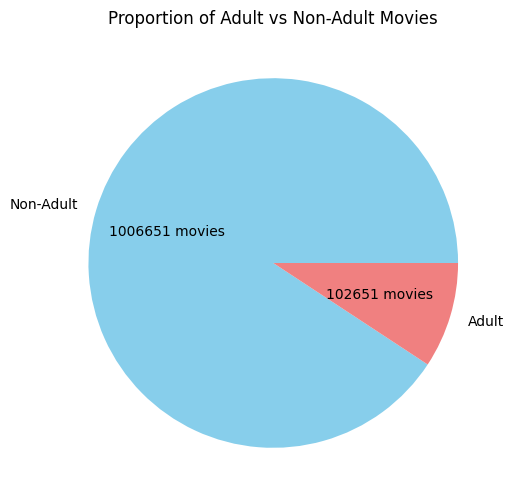

In [ ]:
# Count the number of adult and non-adult movies
movie_counts = movie_df['adult'].value_counts()

# Plotting the Pie Chart with actual counts
plt.figure(figsize=(6, 6))
movie_counts.plot(kind='pie', labels=['Non-Adult', 'Adult'],
                  autopct=lambda p: f'{int(p * sum(movie_counts) / 100)} movies',
                  colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Adult vs Non-Adult Movies')
plt.ylabel('')  # Hide y-axis label for pie chart
plt.show()

In [ ]:
# check year column
movie_df['release_date'].value_counts()

,count
release_date,
2006-01-01,3554
2010-01-01,3360
2011-01-01,3331
2009-01-01,3297
2007-01-01,3252
...,...
1898-03-29,1
1919-04-23,1
1916-04-06,1


In [ ]:
movie_df['genres'].value_counts()

,count
genres,
Documentary,132282
Drama,105045
Comedy,58164
Animation,30906
Music,24989
...,...
"Animation, Crime, Comedy, Family",1
"Thriller, Romance, Drama, Crime, Adventure",1
"Animation, History, Drama, TV Movie, Documentary",1


In [ ]:
def split_genres(genres_column):
    """Function to split comma-separated genres values into dictionaries for easy normalize.

    Args:
        genres_column (Series): The 'genres' column of the DataFrame.

    Returns:
        Series: 'genres' column with values converted into dictionaries.
    """
    # Ensure the column is of type string
    genres_column = genres_column.astype(str)

    def transform_genres(x):
        if x:
            genres = {i: genres.strip() for i, genres in enumerate(x.split(','))}
            return genres
        else:
            return {}

    # Apply the transformation
    return genres_column.apply(transform_genres)

movie_df['genres'] = split_genres(movie_df['genres'])

In [ ]:
movie_df['genres'].value_counts()

,count
genres,
{0: 'nan'},439732
{0: 'Documentary'},132282
{0: 'Drama'},105045
{0: 'Comedy'},58164
{0: 'Animation'},30906
...,...
"{0: 'Family', 1: 'Animation', 2: 'Action'}",1
"{0: 'History', 1: 'Western', 2: 'Action', 3: 'Adventure'}",1
"{0: 'Animation', 1: 'Romance', 2: 'Comedy', 3: 'Horror'}",1


In [ ]:
def clean_release_date(release_date):
    """Function to clean the 'year' column of a DataFrame.

    Args:
        release_date (Series): The 'year' column of the DataFrame.

    Returns:
        Series: Cleaned 'year' column.
    """
    # Remove parentheses and extra characters
    release_date = release_date.str.replace(r'[\(\)I]', '', regex=True)

    # Fill missing values with empty string
    release_date.fillna('', inplace=True)

    # Split the string by '–' and keep the first part if present
    release_date = release_date.apply(lambda x: x.split('–')[0] if '–' in x else x)

    # Extract the year using regex
    release_date = release_date.str.extract(r'(\d+)')

    return release_date

# Applying the function to the 'year' column of the DataFrame
movie_df['release_date'] = clean_release_date(movie_df['release_date'])

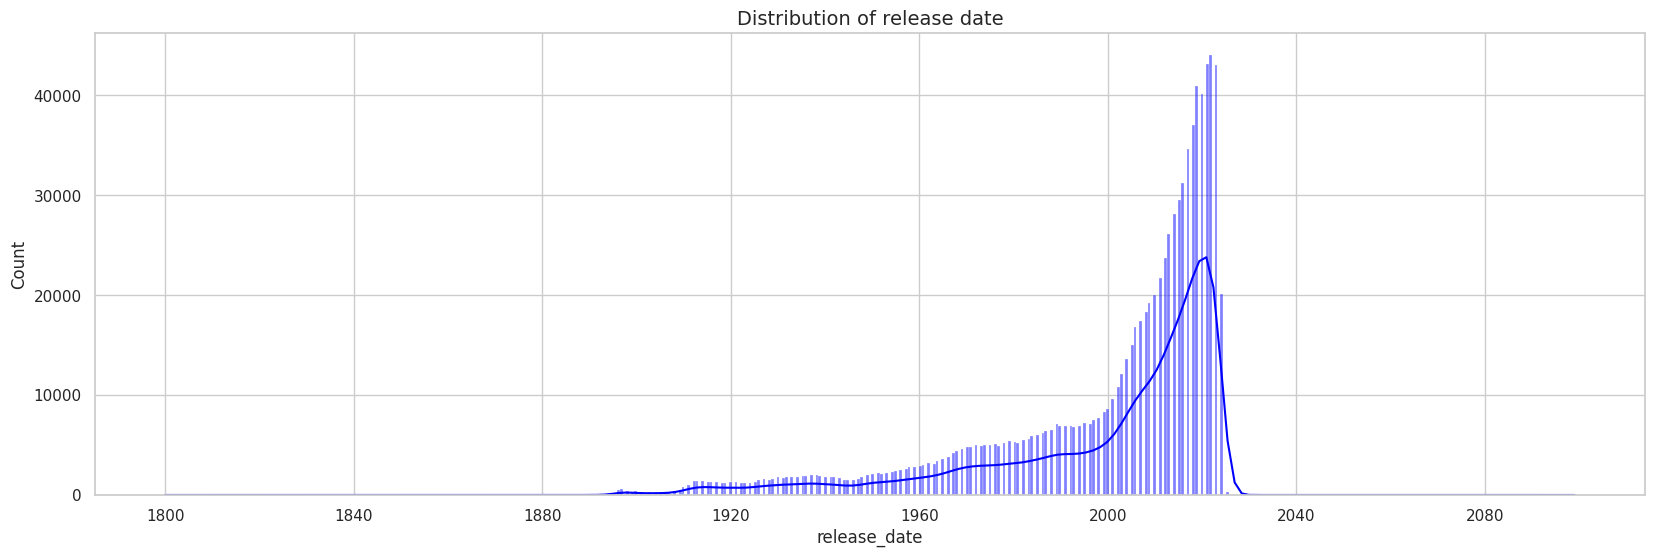

In [ ]:
#Visualize the distribution of the 'release_date' column
import matplotlib.pyplot as plt

# # Convert the 'release date' column to datetime object
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])

# Set the style of the visualization
sns.set(style='whitegrid')

# Create subplots
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

#Plotting
sns.histplot(movie_df['release_date'], kde=True, color='blue', ax=ax)

# Set title of the visualization
ax.set_title('Distribution of release date', fontsize=14)

plt.show()

In [ ]:
movie_df.shape

(1109303, 24)

In [ ]:
#Fill missing values in the 'revenue' column
movie_df['vote_count'] = movie_df['vote_count'].fillna('0')
movie_df['revenue'] = movie_df['revenue'].fillna('0')
movie_df['vote_average'] = movie_df['vote_average'].fillna('0')

In [ ]:
# search the row where production_companies columns contains this pattern

pattern = r'production_companies:\s*([^|]*)'

check = movie_df['production_companies'].str.contains(pattern, case=False, na=False)

movie_df[check]

<ipython-input-21-cee4f34134a7>:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  check = movie_df['production_companies'].str.contains(pattern, case=False, na=False)


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords


In [ ]:
#Check the movie name 'Inception'
check = movie_df[movie_df['title'] == 'Inception']

check

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-01-01,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"{0: 'Action', 1: 'Science Fiction', 2: 'Advent...","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
502400,1352799,Inception,0.000,0,In Production,NaT,0,0,False,NaN,...,Inception,"As James lives his quiet life, his mind is ful...",0.900,NaN,Sick.,{0: 'Horror'},NaN,United States of America,English,NaN


In [ ]:
movie_df['production_companies'].value_counts()

,count
production_companies,
Evil Angel,2892
ONF | NFB,2201
BBC,2123
Metro-Goldwyn-Mayer,2038
Columbia Pictures,1934
...,...
"ASA Film Production, RysRæs, Nordisk Film Denmark",1
Movimento Filmes,1
Romesh Films,1


In [ ]:
def split_companies(companies_column):
    """Function to split comma-separated production_companies values into dictionaries for easy normalize.

    Args:
        genres_column (Series): The 'production_companies' column of the DataFrame.

    Returns:
        Series: 'production_companies' column with values converted into dictionaries.
    """
    # Ensure the column is of type string and handle missing values
    companies_column = companies_column.fillna('').astype(str)

    def transform_companies(x):
        if x:
            companies = {i: production_companies.strip() for i, production_companies in enumerate(x.split(','))}
            return companies
        else:
            return {}

    # Apply the transformation
    return companies_column.apply(transform_companies)

movie_df['production_companies'] = split_companies(movie_df['production_companies'])

In [ ]:
# Apply value_counts directly on the stringified production companies and convert to a DataFrame
company_counts_df = movie_df['production_companies'].apply(lambda x: str(x)).value_counts().reset_index()

# Rename columns for clarity
company_counts_df.columns = ['production_companies', 'count']

# Display the DataFrame
company_counts_df

,production_companies,count
0,{},605291
1,{0: 'Evil Angel'},2892
2,{0: 'ONF | NFB'},2201
3,{0: 'BBC'},2123
4,{0: 'Metro-Goldwyn-Mayer'},2038
...,...,...
202794,{0: 'Associates (Asia) Film Company'},1
202795,"{0: 'ASA Film Production', 1: 'RysRæs', 2: 'No...",1
202796,{0: 'Movimento Filmes'},1
202797,{0: 'Romesh Films'},1


In [ ]:
movie_df

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-01-01,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"{0: 'Action', 1: 'Science Fiction', 2: 'Advent...","{0: 'Legendary Pictures', 1: 'Syncopy', 2: 'Wa...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-01-01,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"{0: 'Adventure', 1: 'Drama', 2: 'Science Ficti...","{0: 'Legendary Pictures', 1: 'Syncopy', 2: 'Ly...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-01-01,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"{0: 'Drama', 1: 'Action', 2: 'Crime', 3: 'Thri...","{0: 'DC Comics', 1: 'Legendary Pictures', 2: '...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-01-01,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"{0: 'Action', 1: 'Adventure', 2: 'Fantasy', 3:...","{0: 'Dune Entertainment', 1: 'Lightstorm Enter...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-01-01,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"{0: 'Science Fiction', 1: 'Action', 2: 'Advent...",{0: 'Marvel Studios'},United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109664,719967,Le Sacré-Coeur : Mégastructure historique,0.000,0,Released,2020-01-01,0,0,False,NaN,...,Le Sacré-Coeur : Mégastructure historique,NaN,0.600,NaN,NaN,{0: 'Documentary'},{0: 'La Famiglia'},France,NaN,"paris, france, architecture, church, art"
1109665,719970,Zoku jūdai no seiten,0.000,0,Released,1953-01-01,0,94,False,NaN,...,続十代の性典,Film directed by Saeki Kozo with Wakao Ayako.,1.156,/77mW9o8GaoUdBezujTXhshAPUtl.jpg,NaN,{0: 'nan'},{0: 'Daiei Film'},Japan,Japanese,NaN
1109666,719971,Haluaman,0.000,0,Released,2022-01-01,0,149,False,NaN,...,Haluaman,Upcoming Movie by Abhimanyu Mukherjee & Team,1.400,/uqkX7oojT7EBfmStaxK4FgYfhY2.jpg,NaN,{0: 'nan'},{0: 'Artage & Pandemonium Productions'},India,Bengali,NaN
1109667,719973,続々十代の性典,0.000,0,Released,1953-01-01,0,94,False,NaN,...,続々十代の性典,Film directed by Eichi Koishi and starring Wak...,7.875,/agS9LUH3gbvES5ViOGC6KEAYxgT.jpg,NaN,{0: 'nan'},{0: 'Daiei Film'},Japan,Japanese,NaN


In [ ]:
movie_df['vote_count'].skew()

40.487102616447174

In [ ]:
movie_df['revenue'].skew()

61.02750598362251

In [ ]:
log_transform = np.log1p(movie_df['vote_count'])
log_transform.skew()

3.0291993211291435

In [ ]:
sqrt_transform = np.sqrt(movie_df['vote_count'])
sqrt_transform.skew()

14.1441606883976

In [ ]:
from scipy import stats

# Add 1 to all values to make them positive
positive_vote_count = movie_df['vote_count'] + 1

box_cox_transform1, _ = stats.boxcox(positive_vote_count) #numpy array
pd.Series(box_cox_transform1).skew()   # now we convert numpy array into panda series

0.9621159260638952

In [ ]:
movie_df['vote_count_Norm'] = pd.Series(box_cox_transform1) # storing the transform in new column

In [ ]:
log_transform = np.log1p(movie_df['revenue'])
log_transform.skew()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


8.15471344473443

In [ ]:
# Check for non-positive values
non_positive_revenue = movie_df[movie_df['revenue'] <= 0]

# If there are any non-positive values, drop them or adjust accordingly
if not non_positive_revenue.empty:
    print(f"Dropping {len(non_positive_revenue)} non-positive revenue entries.")
    positive_revenue_df = movie_df[movie_df['revenue'] > 0]
else:
    positive_revenue_df = movie_df

# Add 1 to all values (optional, only if you need the shift)
positive_revenue = positive_revenue_df['revenue'] + 1

# Apply Box-Cox transformation
box_cox_transform2, _ = stats.boxcox(positive_revenue)

# Convert to pandas Series
pd.Series(box_cox_transform2).skew()

Dropping 1088776 non-positive revenue entries.


-0.14908579391686957

In [ ]:
movie_df['revenue_Norm'] = pd.Series(box_cox_transform2) # storing the transform in new column

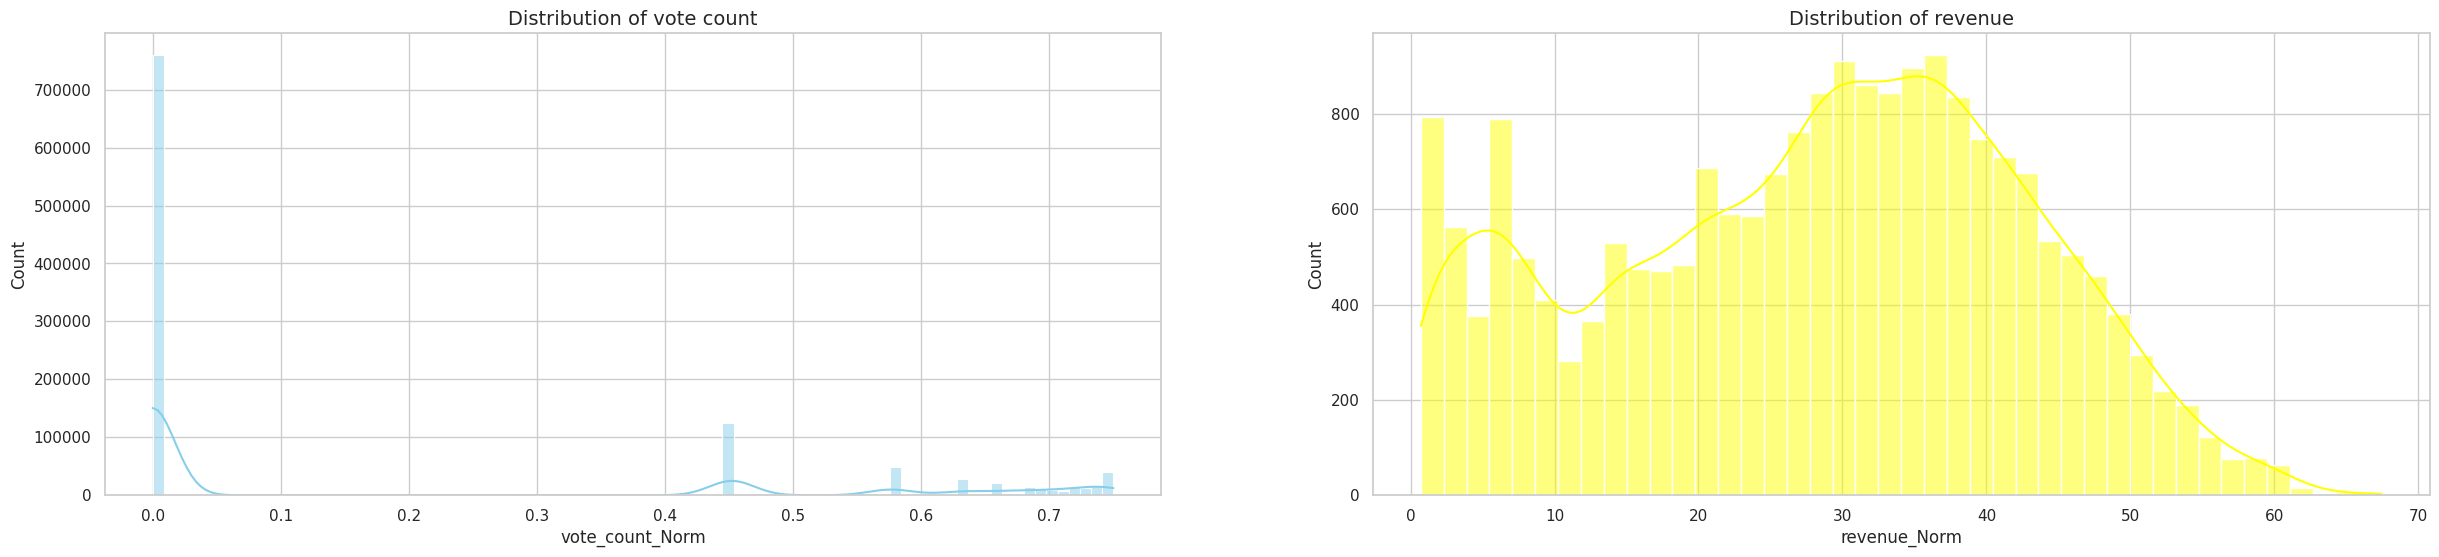

In [ ]:
# Set the style of the visualization
sns.set(style='whitegrid')

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(30, 6))

sns.histplot(movie_df['vote_count_Norm'], kde=True, color='skyblue', ax=ax[0])
sns.histplot(movie_df['revenue_Norm'], kde=True, color='yellow', ax=ax[1])

# Set title of the visualization
ax[0].set_title('Distribution of vote count', fontsize=14)
ax[1].set_title('Distribution of revenue', fontsize=14)

plt.show()


In [ ]:
#Drop the row where the stars have empty {} value
movie_df = movie_df[movie_df['production_companies'] != {}]

In [ ]:
movie_df['title'].value_counts()

,count
title,
Home,55
Mother,46
Carmen,41
Alone,38
Brothers,37
...,...
Pécsi szál,1
Drawn to the Flame,1
The Anal Adventures Of Max Hardcore 6,1


In [ ]:
# Function to normalize any column with dictionary-like data and remove NaN
def normalize_column(df, column_name, prefix):
    # Convert the dictionary into separate columns
    normalized_df = pd.DataFrame(df[column_name].apply(pd.Series))

    # Rename columns with the given prefix (like Genre_1, Genre_2, ...)
    normalized_df.columns = [f'{prefix}_{i+1}' for i in range(normalized_df.shape[1])]


    # Concatenate the new columns back to the original DataFrame
    df = pd.concat([df.drop(column_name, axis=1), normalized_df], axis=1)

    return df

# Apply the function to both 'genres' and 'production_companies' columns
df = normalize_column(movie_df, 'genres', 'Genre')
df = normalize_column(df, 'production_companies', 'Company') # Use the updated df
df

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,Company_21,Company_22,Company_23,Company_24,Company_25,Company_26,Company_27,Company_28,Company_29,Company_30
0,27205,Inception,8.364,34495,Released,2010-01-01,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,157336,Interstellar,8.417,32571,Released,2014-01-01,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,155,The Dark Knight,8.512,30619,Released,2008-01-01,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19995,Avatar,7.573,29815,Released,2009-01-01,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24428,The Avengers,7.710,29166,Released,2012-01-01,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109658,719975,Jûdai no seiten,0.000,0,Released,1953-01-01,0,82,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109664,719967,Le Sacré-Coeur : Mégastructure historique,0.000,0,Released,2020-01-01,0,0,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109665,719970,Zoku jūdai no seiten,0.000,0,Released,1953-01-01,0,94,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109666,719971,Haluaman,0.000,0,Released,2022-01-01,0,149,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df.columns)

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'production_countries',
       'spoken_languages', 'keywords', 'vote_count_Norm', 'revenue_Norm',
       'Genre_1', 'Genre_2', 'Genre_3', 'Genre_4', 'Genre_5', 'Genre_6',
       'Genre_7', 'Genre_8', 'Genre_9', 'Genre_10', 'Genre_11', 'Genre_12',
       'Company_1', 'Company_2', 'Company_3', 'Company_4', 'Company_5',
       'Company_6', 'Company_7', 'Company_8', 'Company_9', 'Company_10',
       'Company_11', 'Company_12', 'Company_13', 'Company_14', 'Company_15',
       'Company_16', 'Company_17', 'Company_18', 'Company_19', 'Company_20',
       'Company_21', 'Company_22', 'Company_23', 'Company_24', 'Company_25',
       'Company_26', 'Company_27', 'Company_28', 'Company_29', 'Company_30'],
      dtype='object')


In [ ]:
df.columns.tolist()

['id',
 'title',
 'vote_average',
 'vote_count',
 'status',
 'release_date',
 'revenue',
 'runtime',
 'adult',
 'backdrop_path',
 'budget',
 'homepage',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'tagline',
 'production_countries',
 'spoken_languages',
 'keywords',
 'vote_count_Norm',
 'revenue_Norm',
 'Genre_1',
 'Genre_2',
 'Genre_3',
 'Genre_4',
 'Genre_5',
 'Genre_6',
 'Genre_7',
 'Genre_8',
 'Genre_9',
 'Genre_10',
 'Genre_11',
 'Genre_12',
 'Company_1',
 'Company_2',
 'Company_3',
 'Company_4',
 'Company_5',
 'Company_6',
 'Company_7',
 'Company_8',
 'Company_9',
 'Company_10',
 'Company_11',
 'Company_12',
 'Company_13',
 'Company_14',
 'Company_15',
 'Company_16',
 'Company_17',
 'Company_18',
 'Company_19',
 'Company_20',
 'Company_21',
 'Company_22',
 'Company_23',
 'Company_24',
 'Company_25',
 'Company_26',
 'Company_27',
 'Company_28',
 'Company_29',
 'Company_30']

In [ ]:
df = df[
    (df['vote_count'] >= 1) &
    (df['revenue'] >= 1) &
    (df['runtime'] >= 1)
]

In [ ]:
# Define the desired column order
column_order = [
    'id',  # Assuming you have a unique identifier for movies
    'overview',  # Your description column
    'release_date',  # Year of release (if present)
    'Genre_1', 'Genre_2', 'Genre_3', 'Genre_4', 'Genre_5', 'Genre_6', 'Genre_7', 'Genre_8', 'Genre_9',  # Genre columns
    'Company_1', 'Company_2', 'Company_3', 'Company_4', 'Company_5', 'Company_6', 'Company_7', 'Company_8', 'Company_9', 'Company_10', 'Company_11', 'Company_12', 'Company_13', 'Company_14', 'Company_15', 'Company_16', 'Company_17', 'Company_18', 'Company_19', 'Company_20', 'Company_21', 'Company_22', 'Company_23', 'Company_24', 'Company_25',  # Company columns
    'vote_count',  # Assuming there's a votes column
    'revenue',  # Assuming there's a gross income column
    'runtime',
    'title',
    'popularity'
]

# Reorder the DataFrame according to the defined column order
df = df[column_order]

# Display the reordered DataFrame
df


,id,overview,release_date,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,...,Company_21,Company_22,Company_23,Company_24,Company_25,vote_count,revenue,runtime,title,popularity
0,27205,"Cobb, a skilled thief who commits corporate es...",2010-01-01,Action,Science Fiction,Adventure,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,34495,825532764,148,Inception,83.952
1,157336,The adventures of a group of explorers who mak...,2014-01-01,Adventure,Drama,Science Fiction,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,32571,701729206,169,Interstellar,140.241
2,155,Batman raises the stakes in his war on crime. ...,2008-01-01,Drama,Action,Crime,Thriller,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30619,1004558444,152,The Dark Knight,130.643
3,19995,"In the 22nd century, a paraplegic Marine is di...",2009-01-01,Action,Adventure,Fantasy,Science Fiction,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,29815,2923706026,162,Avatar,79.932
4,24428,When an unexpected enemy emerges and threatens...,2012-01-01,Science Fiction,Action,Adventure,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,29166,1518815515,143,The Avengers,98.082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347680,1293139,A man with blistering blue eyes possesses an o...,2024-01-01,Action,Adventure,Mystery,Music,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,18,98,White Stare,1.162
348312,12274,Balakrishnan and Ashok are two childhood frien...,2008-01-01,Drama,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1000000,160,Kuselan,3.718
348456,348540,"Based on the True Story, The Watseka Wonder, A...",2009-01-01,Thriller,Documentary,Horror,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1500000,89,The Possessed,1.125
348754,353636,A young woman and her friend travel to a dista...,1993-01-01,Horror,Action,Comedy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,94680,92,Kung Fu Vampire,0.600


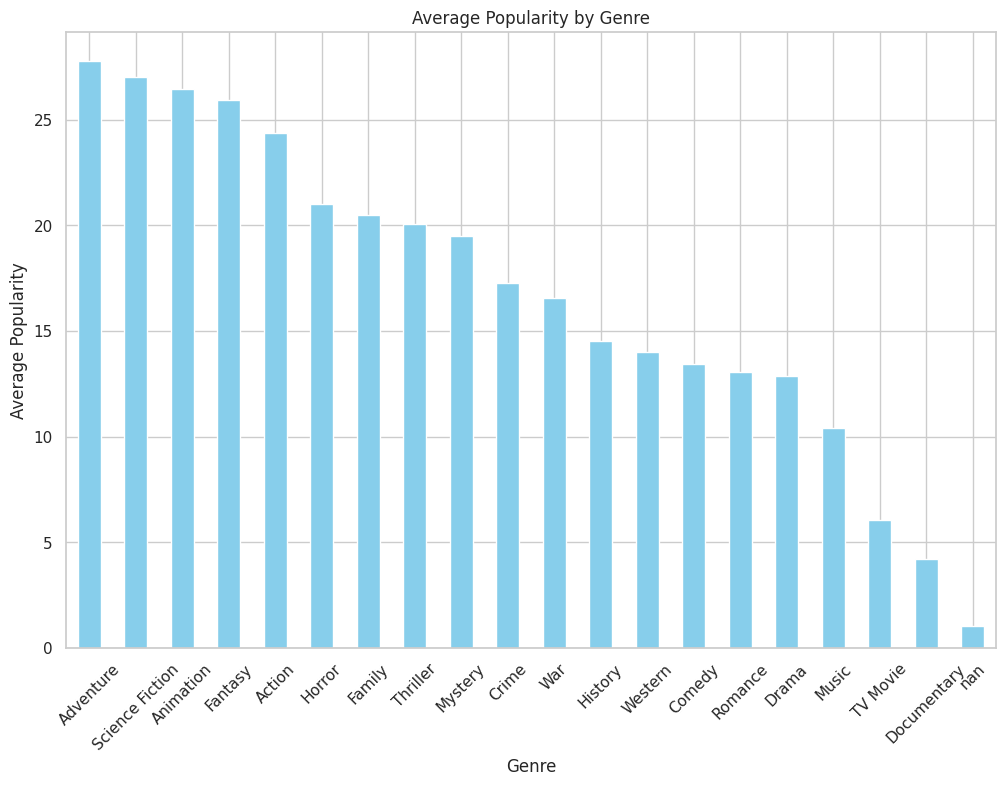

In [ ]:
# Melt the DataFrame to gather Genre columns into a single 'Genre' column
genres_melted = df.melt(id_vars=['popularity'], value_vars=['Genre_1', 'Genre_2', 'Genre_3', 'Genre_4',
                                                              'Genre_5', 'Genre_6', 'Genre_7', 'Genre_8',
                                                              'Genre_9'],
                          var_name='Genre_Type', value_name='Genre')

# Drop rows where Genre is NaN
genres_melted.dropna(subset=['Genre'], inplace=True)

# Group by Genre and calculate average popularity
genre_popularity = genres_melted.groupby('Genre')['popularity'].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 8))
genre_popularity.plot(kind='bar', color='skyblue')
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import os
import sqlite3
import pandas as pd

db_path = r'TMDB_movie_dataset_v11.db'

if not os.path.exists(db_path):
    conn = sqlite3.connect(db_path)
    conn.close()

conn = sqlite3.connect(db_path)
df.to_sql("movie", conn, if_exists="replace", index=False)
conn.close()